#### IMPORTAÇÃO DA BIBLIOTECA PANDAS

In [237]:
# pip install pandas
# pip install matplotlib (para plotage mde gráficos, não necessário importar)
import pandas as pd

# Obter a versão do pandas instalado
pd.__version__

'2.2.1'

#### CRIAÇÃO DO DATAFRAME A PARTIR DE UM DICIONÁRIO

In [238]:
dict_medidas = { 'idade': [15, 18, 25, 25, 40, 55, 58, 60, 80], 'altura': [160, 162, 165, 168, 172, 174, 174, 174, 176] }
dataframe_medidas = pd.DataFrame.from_dict(dict_medidas)

print(dataframe_medidas)

   idade  altura
0     15     160
1     18     162
2     25     165
3     25     168
4     40     172
5     55     174
6     58     174
7     60     174
8     80     176


#### MEDIDAS DE POSIÇÕES

In [239]:
media = dataframe_medidas['idade'].mean() # soma dos valores dividido pelo total de amostras
mediana = dataframe_medidas['idade'].median() # Valor presente no meio da amostra ordenada
moda = dataframe_medidas['idade'].mode() # 0   25

print(media)
print(mediana)
print(moda)

41.77777777777778
40.0
0    25
Name: idade, dtype: int64


#### MEDIDAS DE DISPERSÃO

In [240]:
variancia = dataframe_medidas['idade'].var() # média dos quadrados das diferenças entre cada valor e a média aritmética. Fornece uma ideia de quão distantes os valores estão da média
desvio_padrao = dataframe_medidas['idade'].std() # raiz quadrada da variância
coeficiente_variacao = dataframe_medidas['idade'].std() / dataframe_medidas['idade'].mean() * 100 # desvio padrão dividido pela média, expresso como porcentagem

print(variancia)
print(desvio_padrao)
print(coeficiente_variacao)

509.94444444444446
22.58194952709895
54.05253876167302


#### MEDIDAS DE FORMA

In [241]:
assimetria = dataframe_medidas['idade'].skew() # grau e direção da distorção da distribuição em relação a média
curtose =  dataframe_medidas['idade'].kurtosis() # pico ou a 'pontuação' da distribuição - negativa = dados mais espalhados

print(assimetria)
print(curtose)

0.368108517895537
-1.1344461075421046


#### MEDIDAS ESTATÍSTICAS

In [242]:
medidas_estitisticas_idade = dataframe_medidas['idade'].describe()

print(medidas_estitisticas_idade)

count     9.000000
mean     41.777778
std      22.581950
min      15.000000
25%      25.000000
50%      40.000000
75%      58.000000
max      80.000000
Name: idade, dtype: float64


#### CORRELAÇÃO DE VARIÁVEIS

In [243]:
pearson1 = dataframe_medidas.corr(method='pearson') # Correlação do dataframe
pearson2 = dataframe_medidas['idade'].corr(dataframe_medidas['idade']) # Correlaçã odentre 2 variáveis
spearman = dataframe_medidas.corr(method='spearman')

print(pearson1, end='\n\n')
print(pearson2, end='\n\n')
print(spearman)

           idade    altura
idade   1.000000  0.931024
altura  0.931024  1.000000

0.9999999999999999

           idade    altura
idade   1.000000  0.978803
altura  0.978803  1.000000


### REPRESENTAÇÕES GRÁFICAS

#### HISTOGRAMA

<Axes: >

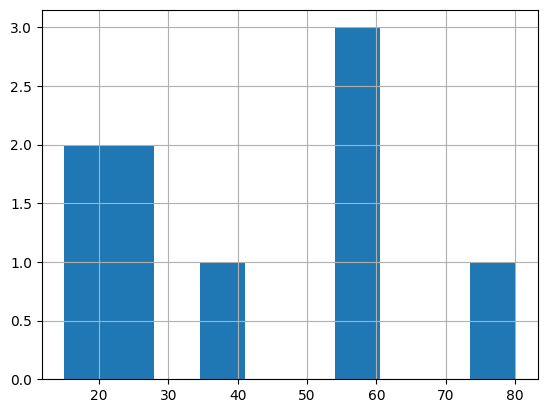

In [244]:
dataframe_medidas['idade'].hist()

#### BARRAS

In [245]:
# Novo dataframe
dict_vendas = { 'categoria': ['marculino', 'feminino', 'infantil', 'casa'], 'valor': [400000, 600000, 250000, 580000], 'quantidade': [3000, 5000, 1500, 2500] }
dataframe_vendas = pd.DataFrame.from_dict(dict_vendas)

print(dataframe_vendas)

   categoria   valor  quantidade
0  marculino  400000        3000
1   feminino  600000        5000
2   infantil  250000        1500
3       casa  580000        2500


<Axes: xlabel='categoria'>

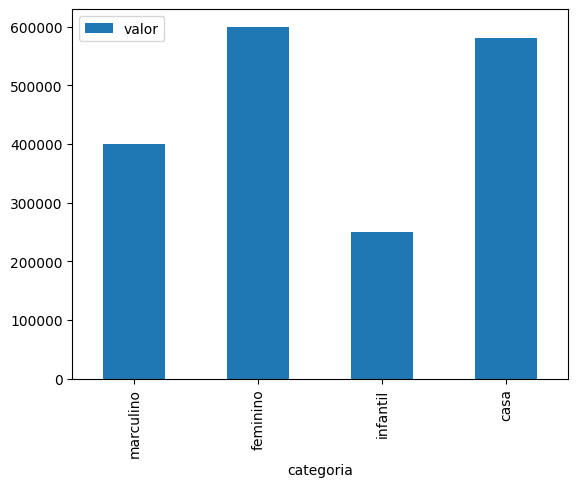

In [246]:
# Barras vertical (categorias x valor)
dataframe_vendas.plot.bar(x='categoria', y='valor')

<Axes: xlabel='categoria'>

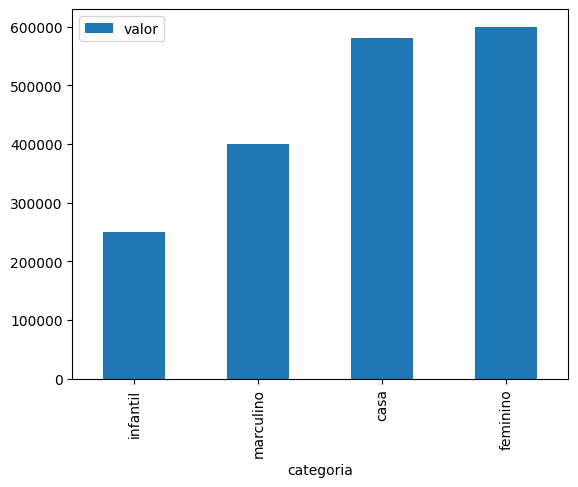

In [247]:
# Barra vertical ordenado pelo valor
dataframe_vendas.sort_values('valor', ascending=True).plot.bar(x='categoria', y='valor')

<Axes: ylabel='categoria'>

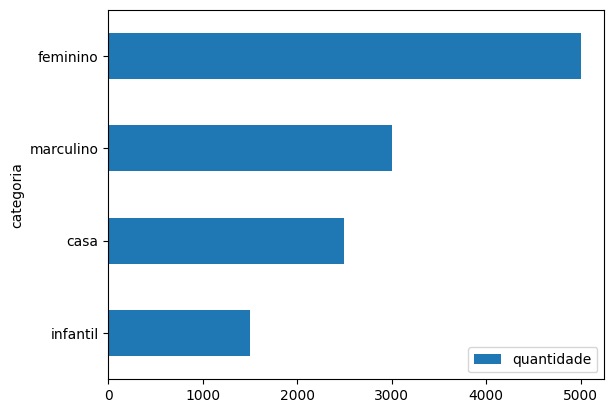

In [248]:
# Barra horozontal ordenado (categoria x quantidade)
dataframe_vendas.sort_values('quantidade', ascending=True).plot.barh(x='categoria', y='quantidade')

#### GRÁFICO DE DISPERSÃO

<Axes: xlabel='idade', ylabel='altura'>

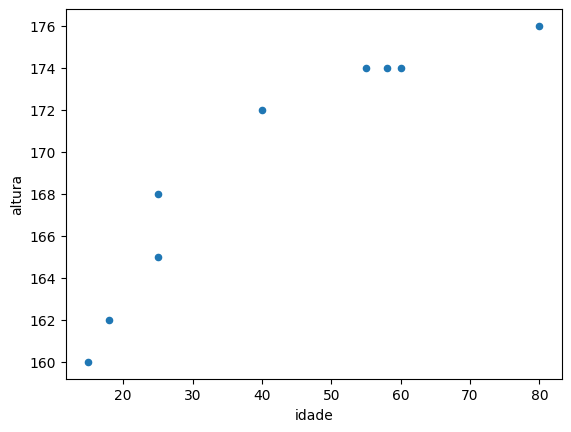

In [249]:
dataframe_medidas.plot.scatter(x='idade', y='altura')

#### BOXPLOT

<Axes: >

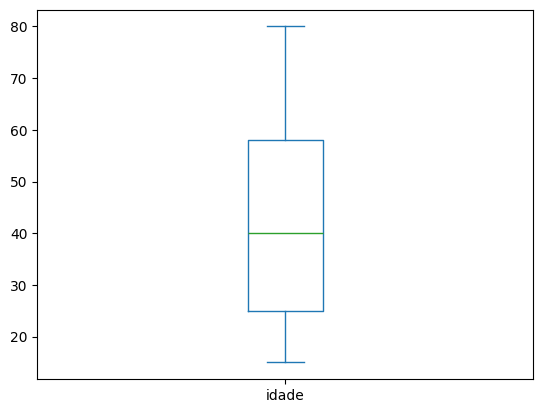

In [250]:
dataframe_medidas['idade'].plot.box()

#### LINHAS

In [251]:
# Novo dataframe com dados temporais
dict_faturamento = { 'data_ref': ['2019-01-01', '2020-01-01', '2021-01-01', '2022-01-01', '2023-01-01'], 'valor': [400000, 800000, 500000, 800000, 900000] }
dataframe_faturamento = pd.DataFrame.from_dict(dict_faturamento)

print(dataframe_faturamento, end='\n\n')

# Precisamos converter os valores da coluna data_ref para o tipo data
dataframe_faturamento['data_ref'] = pd.to_datetime(dataframe_faturamento['data_ref'])

print(dataframe_faturamento.info())

     data_ref   valor
0  2019-01-01  400000
1  2020-01-01  800000
2  2021-01-01  500000
3  2022-01-01  800000
4  2023-01-01  900000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   data_ref  5 non-null      datetime64[ns]
 1   valor     5 non-null      int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 212.0 bytes
None


<Axes: xlabel='data_ref'>

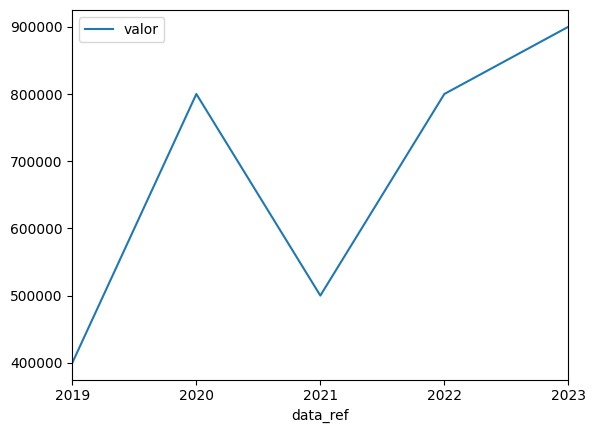

In [252]:
dataframe_faturamento.plot.line(x='data_ref', y='valor')